In [1]:
!pip install imblearn
!pip install ultimate==2.1.2
!pip install scikit-learn-intelex

In [2]:
import pickle
import imblearn
print(imblearn.__version__)
from itertools import *
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from __future__ import print_function
from ultimate.mlp import MLP
import numpy as np
import sys, random
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

0.9.0


In [3]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Data Reading

In [4]:
#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))


#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))
#df = pd.read_csv('MachineLearningCSV.csv')
df = pd.read_csv('df_test.csv')

In [5]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [6]:
df.columns = col_names

In [7]:
df = df.sample(n=70000)

In [8]:
#df = df.sample(n=800000).reset_index(drop=True)

In [9]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [10]:
#df.drop('Unnamed: 0', axis = 1)

In [11]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
143289,53719,53,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
192837,53,32424,1,1,56,130,56,56,56.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
160249,80,86089264,6,7,624,11595,306,0,104.0,156.491533,...,20,10997.0,0.0,10997,10997,85800000.0,0.0,85800000,85800000,DoS Hulk
170359,6009,3,2,0,4,0,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
102668,53,166,2,2,102,224,51,51,51.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
def RForest_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_test_predict = clf.predict(X_test.values.reshape(-1,1))
    clf.score(X_test.values.reshape(-1,1),y_test)
    print(classification_report(y_test,y_test_predict))

# Data Cleaning

In [13]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [14]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [15]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [16]:
df_FwdHeaderLength = df["Fwd_Header_Length"].iloc[:,0]
df.drop("Fwd_Header_Length",axis=1,inplace=True)
df["Fwd_Header_Length"]=df_FwdHeaderLength.values

In [17]:
df.duplicated(subset=None, keep='first')

143289    False
192837    False
160249    False
170359    False
102668    False
          ...  
394010    False
236563    False
15822     False
322875    False
137261    False
Length: 70000, dtype: bool

In [18]:
df.duplicated().sum()/len(df)

0.03201428571428572

In [19]:
# making a bool series
bool_series = df.duplicated()
 
# displaying data
df.head()
 
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,Fwd_Header_Length
240012,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
158968,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
27055,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
83238,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
1221,80,2,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76996,80,5,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
114921,443,83,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
120961,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
219802,443,93,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,64


In [20]:
df.shape

(70000, 79)

In [21]:
df = df[~bool_series].reset_index(drop=True)

In [22]:
df.shape

(67759, 79)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67759 entries, 0 to 67758
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             67759 non-null  int64  
 1   Flow_Duration                67759 non-null  int64  
 2   Total_Fwd_Packets            67759 non-null  int64  
 3   Total_Backward_Packets       67759 non-null  int64  
 4   Total_Length_of_Fwd_Packets  67759 non-null  int64  
 5   Total_Length_of_Bwd_Packets  67759 non-null  int64  
 6   Fwd_Packet_Length_Max        67759 non-null  int64  
 7   Fwd_Packet_Length_Min        67759 non-null  int64  
 8   Fwd_Packet_Length_Mean       67759 non-null  float64
 9   Fwd_Packet_Length_Std        67759 non-null  float64
 10  Bwd_Packet_Length_Max        67759 non-null  int64  
 11  Bwd_Packet_Length_Min        67759 non-null  int64  
 12  Bwd_Packet_Length_Mean       67759 non-null  float64
 13  Bwd_Packet_Lengt

In [24]:
#df = df[(df.Label != 'SQL')&(df.Label != 'Infiltration')&(df.Label != 'Heartbleed')].reset_index(drop=True)

In [25]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [26]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 9810 percentage 14.477781549314484 % 
[53719    53    80  6009 14238] ...
======================= Flow_Duration =======================
Unique values 38771 percentage 57.21896722206644 % 
[      53    32424 86089264        3      166] ...
======================= Total_Fwd_Packets =======================
Unique values 271 percentage 0.3999468705264245 % 
[     1      6      2      8      9     22      3      5      7     79
    198     69     18     14    104      4     12     19     49     13
    101     10     11     40    600     16    527     21     23     28
     41     35     30     17     39     26     24     15     20     25
     82     86     29     71     27     36     33     70     72     68
    313     51    135     37    108     34    257    270     43     58
    626     38     76    314     56     93     59     85     44     31
    230     46     32     84     77   1043    259    190    159     

[1.88679245e+04 3.08413521e+01 8.13109520e-02 0.00000000e+00
 1.20481928e+04] ...
======================= Min_Packet_Length =======================
Unique values 127 percentage 0.18742897622456056 % 
[   6   56    0    2   51   47   40   29   37   30   32   35   45   43
   33   53   36   50   39   34   48   41   42   52   46   38   44   55
   49   64   57 1306   27   85   62   24   61   31   54   28   58   74
   91   69   25   75  163   71   65 1276  252  235   83   73  214   95
   67   63   94   23   59   70   77   84   66   90   88  176   60   72
   78   79   81   76   22  250   68  100  178   86   26  237   18  102
   93  251   82  126  101  174  216   80   89  103  201   92  356  315
  188  212   87   16  118  253  233  137  254   97   96   14  179  289
  248  312   99  329  238  165  104 1233   20  187 1330  517   15  151
   19]
Count_by_unique: 
0       31735
6        7946
2        3462
32       1257
44       1204
        ...  
14          1
15          1
19          1
1330      

In [27]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['Infiltration']


In [28]:
df.shape

(67759, 79)

In [29]:
df.drop(drop_col, axis=1, inplace=True)

In [30]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [31]:
df.shape

(67758, 71)

# Preprocessing

In [32]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    #oversample = SMOTE()
    #X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    
    # No need to perform split, test size leans to 1
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.98, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, test_index in sss.split(X, y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]
    y_train_aux = y_train.copy()
    y_test_aux = y_test.copy()
    y_train_aux['count_'] = 1
    y_test_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_test_aux.groupby(0).count()
    print(y_train, y_test)
    print(X_train.head())
    MMS = MinMaxScaler()
    x_train_scaled = MMS.fit_transform(X_train)
    x_test_scaled = MMS.transform(X_test)
    X = MMS.fit_transform(X)
    X_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)
    print(X_train.shape)
    print(X_test.shape)
    print(x_test_scaled.shape)
    return X_train_scaled, X_test_scaled, y_train, y_test, X, y

In [33]:
x_train_preprocess_model, x_test_preprocess_model, y_train, y_test, X, y = preprocessing_model(df)

[0 0 5 ... 5 0 0]
['Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['Infiltration']
Counter({0: 1})
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.98,
            train_size=None)
TRAIN: [27178 60580  4445 ... 37243 22885  5148] TEST: [ 9261 55791 41298 ... 17221 18583 47544]
TRAIN: [47823 53257 22738 ... 51821 23762  1903] TEST: [60972 17014 65054 ... 50833 22595 18506]
TRAIN: [48389 41958   360 ...  2457  7874 34854] TEST: [65141 62979 35941 ...  3084 15913 65066]
TRAIN: [63199 49183 18472 ... 56176 48717  3261] TEST: [66208 41191 15072 ... 61048 37925 27465]
TRAIN: [57571 60331  3017 ...  4059 10232 46729] TEST: [27739 64345 34777 ... 57848 28833  7270]
        0
57571   0
60331  10
3017    0
34892   3
19101   0
...    ..
29700   0
27141   5
4059    0
10232   0
46729   5

[1355 rows x 1 columns]        0
27739  5
64345  0
34777  0
50645  0
26883  0


In [34]:
x_train_preprocess_model.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Fwd_Header_Length
0,0.006768,1.296709e-03,0.001979,0.001255,0.036205,1.011420e-04,0.080333,0.000000,0.046093,0.057877,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003649
1,0.000336,1.161273e-01,0.004398,0.008283,0.067943,4.573885e-04,0.062622,0.000000,0.041190,0.031733,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007473
2,0.915992,8.750737e-07,0.000000,0.000251,0.000203,9.997562e-07,0.000587,0.004364,0.002585,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000220
3,0.001222,9.733887e-03,0.000440,0.001255,0.000880,1.933029e-03,0.001957,0.000000,0.003733,0.002326,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000791
4,0.000810,8.222026e-04,0.000000,0.000251,0.001793,2.765992e-05,0.005186,0.038545,0.022831,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000220


In [35]:
x_train_preprocess_model.isnull().sum().sum()

0

# Set_Model 

In [36]:
#rfe_column_selection = 20

In [37]:
'''
param_rfe = {
    'loss_type': 'mse',
    'layer_size': [rfe_column_selection,16,16,16,1],
    'activation': 'am2',
    'output_range': [0, 1],
    'output_shrink': 0.001,
    'importance_mul': 0.0001,
    'importance_out': True,
    'rate_init': 0.02, 
    'rate_decay': 0.9, 
    'epoch_train': 10, 
    'epoch_decay': 1,
    'verbose': 0,
}
'''

"\nparam_rfe = {\n    'loss_type': 'mse',\n    'layer_size': [rfe_column_selection,16,16,16,1],\n    'activation': 'am2',\n    'output_range': [0, 1],\n    'output_shrink': 0.001,\n    'importance_mul': 0.0001,\n    'importance_out': True,\n    'rate_init': 0.02, \n    'rate_decay': 0.9, \n    'epoch_train': 10, \n    'epoch_decay': 1,\n    'verbose': 0,\n}\n"

In [38]:
'''
# create pipeline
rfe = RFE(estimator = MLP(param_rfe), n_features_to_select=20)
model = MLPClassifier()
model_ = MLP(param_rfe)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
'''

"\n# create pipeline\nrfe = RFE(estimator = MLP(param_rfe), n_features_to_select=20)\nmodel = MLPClassifier()\nmodel_ = MLP(param_rfe)\npipeline = Pipeline(steps=[('s',rfe),('m',model)])\n"

In [39]:
#pipeline.fit(x_train_preprocess_model, y_train)

In [40]:
#y_train

In [41]:
#model_.fit(x_train_preprocess_model, y_train)

In [42]:
#pipeline[:-1].get_feature_names_out(input_features=None)

In [43]:
#selected_features = pipeline[:-1].get_feature_names_out(input_features=None)

In [44]:
#model.fit(x_train_preprocess_model[selected_features], y_train)

# Serialization

In [45]:
'''
file = open('rfe_mlp_model.pkl', 'wb')
pickle.dump(model, file)
file.close()
'''

"\nfile = open('rfe_mlp_model.pkl', 'wb')\npickle.dump(model, file)\nfile.close()\n"

In [46]:
model = pickle.load(open('rfe_mlp_model.pkl','rb'))

In [47]:
selected_features = ['Destination_Port', 'Flow_Duration', 'Fwd_Packet_Length_Min',
 'Fwd_Packet_Length_Mean', 'Flow_Packets_s', 'Flow_IAT_Mean', 'Flow_IAT_Max',
 'Fwd_IAT_Max', 'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
 'Packet_Length_Mean', 'Packet_Length_Std', 'Average_Packet_Size',
 'Avg_Fwd_Segment_Size', 'Init_Win_bytes_backward', 'min_seg_size_forward',
 'Active_Mean', 'Idle_Max', 'Fwd_Header_Length']

In [48]:
x_test_preprocess_model.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Fwd_Header_Length
0,0.001222,8.189333e-01,0.001099,0.001757,0.011504,0.001932,0.031507,0.000000,0.024411,0.029461,...,0.454545,0.001811,0.0,0.000972,0.002426,0.892727,0.0,0.892727,0.892727,0.001802
1,0.795059,4.000337e-07,0.000000,0.000251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000352
2,0.001222,6.833909e-07,0.000220,0.000000,0.000406,0.000000,0.000587,0.004364,0.002585,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000440
3,0.006768,6.958920e-06,0.000220,0.000000,0.000406,0.000000,0.000587,0.004364,0.002585,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000440
4,0.000810,7.158270e-04,0.000000,0.000251,0.001726,0.000011,0.004990,0.037091,0.021970,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000220


In [49]:
model.score(x_test_preprocess_model[selected_features], y_test)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Active_Mean
- Flow_IAT_Mean
- Idle_Max
- min_seg_size_forward
Feature names seen at fit time, yet now missing:
- Down_Up_Ratio
- Fwd_IAT_Total
- Fwd_Packet_Length_Std
- Init_Win_bytes_forward

  warnings.warn(message, FutureWarning)


0.2294022860412933

In [50]:
x_test_preprocess_model = x_test_preprocess_model[selected_features]

# Evaluate_Model

In [51]:
y_pred_rfemlp=model.predict(x_test_preprocess_model)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Active_Mean
- Flow_IAT_Mean
- Idle_Max
- min_seg_size_forward
Feature names seen at fit time, yet now missing:
- Down_Up_Ratio
- Fwd_IAT_Total
- Fwd_Packet_Length_Std
- Init_Win_bytes_forward

  warnings.warn(message, FutureWarning)


In [52]:
y_pred_rfemlp=pd.DataFrame(y_pred_rfemlp)
y_pred_rfemlp=round(y_pred_rfemlp)

In [53]:
print(classification_report(y_test, y_pred_rfemlp))

              precision    recall  f1-score   support

           0       0.78      0.28      0.41     54185
           1       0.00      0.62      0.00        34
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00      3098
           4       0.00      0.00      0.00       246
           5       0.05      0.00      0.01      4411
           6       0.00      0.07      0.01       136
           7       0.00      0.01      0.00       148
           8       0.01      0.99      0.02       156
           9       0.00      0.00      0.00      3806
          10       0.00      0.00      0.00       120
          11       0.00      0.00      0.00        23

    accuracy                           0.23     66403
   macro avg       0.07      0.16      0.04     66403
weighted avg       0.64      0.23      0.33     66403



C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print('Confusion Matrix RFE/MLP:')
con_rfe_mlp = confusion_matrix(y_test, y_pred_rfemlp)
print(con_rfe_mlp)

Confusion Matrix RFE/MLP:
[[15025 25304     0     0   132   396   990    54 12283     1     0     0]
 [   13    21     0     0     0     0     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0    36     0     0     0]
 [  507     3     0     0     0     2  1488   177   921     0     0     0]
 [   19   162     0     0     0     0     0    51    14     0     0     0]
 [ 3327   347     0     0    19    22    59     0   637     0     0     0]
 [   15     8     0     0     0    12    10     0    91     0     0     0]
 [   48     5     0     0     0    33     1     1    60     0     0     0]
 [    0     0     0     0     2     0     0     0   154     0     0     0]
 [  236  1800     0     0     0     1    15     3  1751     0     0     0]
 [    0    67     0     0     0     1     0     0    52     0     0     0]
 [    0     2     0     0     0     0     0     0    21     0     0     0]]


Text(30.5, 0.5, 'True')

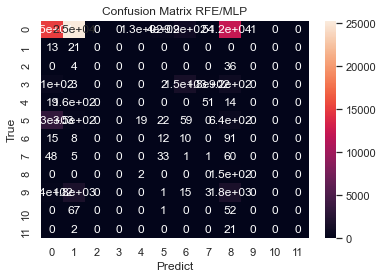

In [55]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(con_rfe_mlp,annot=True,ax=ax)

ax.set_title('Confusion Matrix RFE/MLP') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [56]:
y_pred_rfemlp_vectorized=model.predict_proba(x_test_preprocess_model)#.argmax(axis=1)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Active_Mean
- Flow_IAT_Mean
- Idle_Max
- min_seg_size_forward
Feature names seen at fit time, yet now missing:
- Down_Up_Ratio
- Fwd_IAT_Total
- Fwd_Packet_Length_Std
- Init_Win_bytes_forward

  warnings.warn(message, FutureWarning)


In [57]:
np.unique(y_pred_rfemlp_vectorized[:20])

array([4.58561722e-196, 4.85380748e-185, 1.70814559e-162, 1.38041570e-153,
       6.86512236e-152, 5.64548650e-145, 2.79800810e-143, 1.34557687e-139,
       6.47047900e-130, 3.85126621e-128, 2.86498519e-112, 2.20010982e-111,
       1.09382371e-110, 1.06455331e-109, 7.19645633e-104, 1.30980302e-103,
       3.43263433e-103, 8.36273671e-103, 2.98218114e-102, 8.32483128e-096,
       4.61846501e-092, 4.06854591e-091, 4.52900681e-090, 7.89900268e-090,
       2.15678034e-088, 8.92298317e-085, 2.47753831e-084, 1.42176453e-083,
       1.44035929e-082, 1.86957370e-081, 4.41880942e-081, 1.16747177e-079,
       1.45987871e-079, 9.75135395e-078, 1.08023360e-077, 1.57869606e-077,
       2.09653369e-077, 1.60786598e-075, 3.24326379e-073, 4.83606563e-073,
       7.76632992e-073, 6.35399033e-072, 1.69567467e-071, 6.26817202e-071,
       7.00668725e-071, 4.42855151e-069, 5.33586795e-069, 1.39250029e-068,
       6.62998022e-068, 8.09786905e-067, 1.17467731e-066, 2.67219752e-066,
       4.86084619e-066, 9

In [58]:
y_pred_rfemlp_vectorized=pd.DataFrame(y_pred_rfemlp_vectorized)
y_pred_rfemlp_vectorized=round(y_pred_rfemlp_vectorized)

In [59]:
y_pred_rfemlp_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y_test_vectorized = pd.get_dummies(y_test.astype(str), prefix='Label')

In [61]:
y_test_vectorized.head()

,Label_0,Label_1,Label_10,Label_11,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
27739,0,0,0,0,0,0,0,1,0,0,0,0
64345,1,0,0,0,0,0,0,0,0,0,0,0
34777,1,0,0,0,0,0,0,0,0,0,0,0
50645,1,0,0,0,0,0,0,0,0,0,0,0
26883,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#y_pred_rfemlp_vectorized = pd.get_dummies(y_pred_rfemlp_vectorized.astype(str), prefix='Label')

In [63]:
y_pred_rfemlp_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
if y_test_vectorized.shape[1] < 2:    
    y_test_vectorized_aux = y_test_vectorized.copy()
    y_test_vectorized_aux['count_'] = 1
    print(y_test_vectorized_aux.groupby(0).count())

In [65]:
y_test_vectorized

,Label_0,Label_1,Label_10,Label_11,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
27739,0,0,0,0,0,0,0,1,0,0,0,0
64345,1,0,0,0,0,0,0,0,0,0,0,0
34777,1,0,0,0,0,0,0,0,0,0,0,0
50645,1,0,0,0,0,0,0,0,0,0,0,0
26883,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47952,1,0,0,0,0,0,0,0,0,0,0,0
1128,1,0,0,0,0,0,0,0,0,0,0,0
57848,1,0,0,0,0,0,0,0,0,0,0,0
28833,1,0,0,0,0,0,0,0,0,0,0,0


In [66]:
#y_pred_rfemlp_vectorized.drop(['Label_-0.0'], inplace=True, axis=1)

In [67]:
y_pred_rfemlp_vectorized.shape 

(66403, 12)

In [68]:
y_test_vectorized.shape

(66403, 12)

In [69]:
type(y_pred_rfemlp_vectorized)

pandas.core.frame.DataFrame

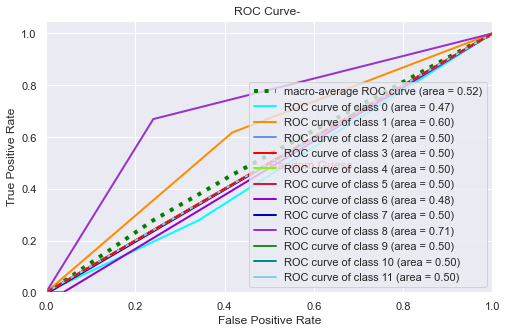

In [70]:
n_classes = y_test_vectorized.shape[1] 
pred1 = y_pred_rfemlp_vectorized.values #          model.predict(x_test)
y_test_ = y_test_vectorized.values

t1 = sum(x == 0 for x in pred1 - y_test_) / len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i])) #0

plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess', (.5, .48), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- ')
plt.legend(loc="lower right")
plt.show()
#y = pd.get_dummies(y, prefix='Label')
#*****************************

# K-Fold Cross Validation 

In [75]:
def evaluate_model(cv, X, y):
    # get the model
    #model = set_model_cv()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=2, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()

In [76]:
#mean_scores, min_scores, max_scores = evaluate_model(8, X, y)

In [77]:
#print(mean_scores, min_scores, max_scores)

In [78]:

ideal, _, _ = evaluate_model(LeaveOneOut(), X, y)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11) # fold = splits
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=False)#, random_state=0)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv, X, y)
	# report performance
	print('> folds=%d, balanced_accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)


Ideal: 0.745
> folds=2, balanced_accuracy=0.737 (0.718,0.756)
> folds=3, balanced_accuracy=0.735 (0.724,0.747)
> folds=4, balanced_accuracy=0.740 (0.731,0.749)
> folds=5, balanced_accuracy=0.738 (0.722,0.754)
> folds=6, balanced_accuracy=0.726 (0.716,0.735)
> folds=7, balanced_accuracy=0.736 (0.736,0.737)
> folds=8, balanced_accuracy=0.740 (0.736,0.743)
> folds=9, balanced_accuracy=0.741 (0.739,0.744)
> folds=10, balanced_accuracy=0.734 (0.722,0.746)


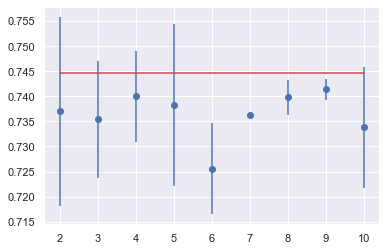

In [79]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()